In [1]:
import json
import time
import requests
import matplotlib.pyplot as plt
import json
import os
#import cv2
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, models
from matplotlib import pyplot
from matplotlib.image import imread
import seaborn as sns
from scipy.stats import norm
import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import copy
import os
import torch
from PIL import Image
from PIL import Image, ImageDraw
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
from dataclasses import dataclass
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
from torch.utils.data import random_split
from torch.autograd import Variable
from torch.utils.model_zoo import load_url as load_state_dict_from_url
import math
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from numpy import *
Category=["backgrounds", "fashion","nature", 
"science", "education","feelings", "health", "people", "religion", "places", 
"animals", "industry", "computer", "food","sports", "transportation", "travel", "buildings", "business", "music"]

In [2]:
df=pd.read_csv("D:/photo/dh/pic2/ALL.csv")
relationship=df.iloc[:,2:]

In [3]:
df=pd.read_csv("D:/photo/dh/pic3/doubleviews.csv")

In [4]:
# to see the distribution of the number of likes
Category=["backgrounds", "fashion","nature", 
"science", "education","feelings", "health", "people", "religion", "places", 
"animals", "industry", "computer", "food","sports", "transportation", "travel", "buildings", "business", "music"]
views=[]
likes=[]
downloads=[]
comments=[]
Path=[]
for i in range(len(Category)):
    for n in range(4):
        if n !=0:
            pat='D:/photo/dh/pic2/'+Category[i]+str(n)+'/'
            JSONdocument = open(pat+'new_json.json')
            popular_json = json.load(JSONdocument)
            popular=popular_json['hits']
            Path.append(pat)
            for hit in popular:
                views.append(hit['views'])
                likes.append(hit['likes'])
                downloads.append(hit['downloads'])
                comments.append(hit["comments"])
for i in range(len(Category)):
    for n in range(4):
        if n !=0:
            pat='D:/photo/dh/pic3/'+Category[i]+str(n)+'/'
            JSONdocument = open(pat+'new_json.json')
            popular_json = json.load(JSONdocument)
            popular=popular_json['hits']
            Path.append(pat)
            for hit in popular:
                views.append(hit['views'])
                likes.append(hit['likes'])
                downloads.append(hit['downloads'])
                comments.append(hit["comments"])
location=[]
for cat in range(len(Category)):
    for num in range(4):
        if num !=0:
            pat='D:/photo/dh/pic2/'+Category[cat]+str(num)+'/'
            for s in range(200):
                singlelocation=pat+str(s)+'.jpg'
                location.append(singlelocation)

for cat in range(len(Category)):
    for num in range(4):
        if num !=0:
            pat='D:/photo/dh/pic3/'+Category[cat]+str(num)+'/'
            for s in range(200):
                singlelocation=pat+str(s)+'.jpg'
                location.append(singlelocation)

#print(len(path_list))
ALL={'Path':location,"Views":views,"likes":likes,"downloads":downloads,"comments":comments}
df=pd.DataFrame(ALL)
#df.to_csv("D:/photo/dh/pic2/ALL.csv")

#plt.hist(TAGS)
#print(len(TAGS))
#print(sum(TAGS)/12000)

In [5]:
data_list=df['Views']
res = np.percentile(data_list, (25, 50, 75), interpolation='midpoint')
print(res)
print(mean(df["Views"]))

[ 1247.  14122.5 77812.5]
91732.35783333333


C:\Users\lenovo\AppData\Local\Temp\ipykernel_24444\3116253236.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  res = np.percentile(data_list, (25, 50, 75), interpolation='midpoint')


<AxesSubplot:>

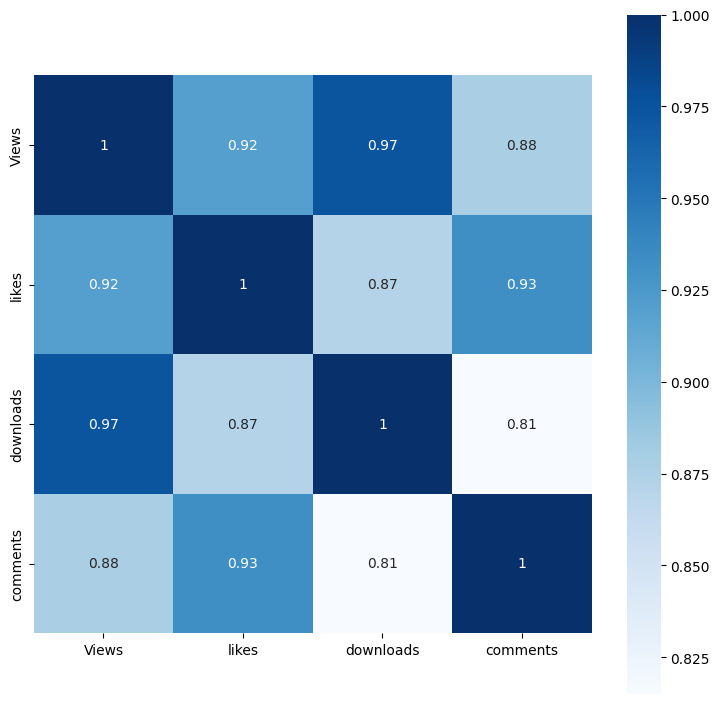

In [6]:
df_coor=relationship.corr()
df_coor.head()
plt.subplots(figsize=(9,9),dpi=100,facecolor='w')# 设置画布大小，分辨率，和底色

fig=sns.heatmap(df_coor,annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')#annot为热力图上显示数据；fmt='.2g'为数据保留两位有效数字,square呈现正方形，vmax最大值为1
fig

C:\Users\lenovo\anaconda3\envs\zijian\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\envs\zijian\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Views'>

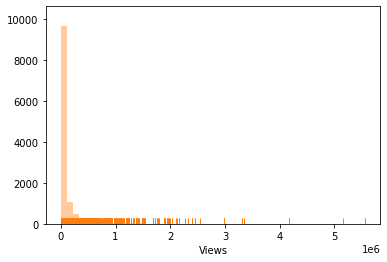

In [7]:
plt.hist(relationship["Views"],label='VIEWS',bins=10000)
sns.distplot(relationship["Views"],kde=False, rug=True)
#relationship["Views"].hist(bins=50,alpha = 0)
#relationship["Views"].plot(kind = 'kde', secondary_y=True)

In [8]:
a=[]
for i in df['Views']:
    if i <8000:
        a.append(i)
print(len(a))


10361


In [9]:
print("the mean of the views is : ",mean(df['Views'])," the median of the views is : ",median(df['Views'])) 
print("the mean of the likes is : ",mean(df['likes'])," the median of the likes is : ",median(df['likes']))
print("the mean of the downloads is : ",mean(df['downloads'])," the median of the likes is : ",median(df['downloads']))
print("the mean of the comments is : ",mean(df['comments'])," the median of the likes is : ",median(df['comments']))

the mean of the views is :  91732.35783333333  the median of the views is :  14122.5
the mean of the likes is :  195.120125  the median of the likes is :  59.0
the mean of the downloads is :  58164.60295833334  the median of the likes is :  8981.0
the mean of the comments is :  42.074416666666664  the median of the likes is :  18.0


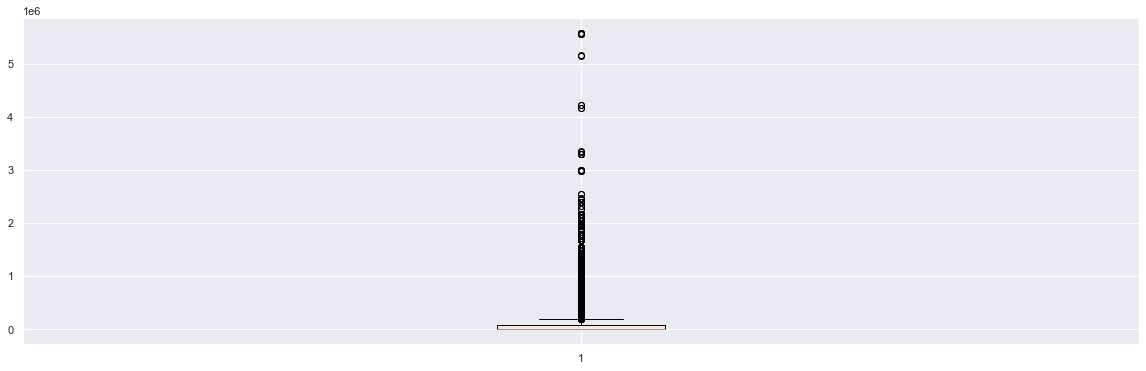

In [10]:
plt.rcParams['figure.figsize'] = (20, 6.0)
sns.set(style="darkgrid")
label='views'
plt.boxplot(df['Views'])

plt.show()

In [11]:
Category=["backgrounds", "fashion","nature", 
"science", "education","feelings", "health", "people", "religion", "places", 
"animals", "industry", "computer", "food","sports", "transportation", "travel", "buildings", "business", "music"]
ALL={}
ALLVIEWS=0
for i in range(len(Category)):
    views=0
    for n in range(4):
        if n !=0:
            pat='D:/photo/dh/pic2/'+Category[i]+str(n)+'/'
            JSONdocument = open(pat+'new_json.json')
            popular_json = json.load(JSONdocument)
            popular=popular_json['hits']
            for hit in popular:
                LIKE=hit['views']
                views=views+LIKE
                ALLVIEWS=ALLVIEWS+LIKE
    ALL[Category[i]]=views

orderV=sorted(ALL.items(),key=lambda x:x[1],reverse=True)


In [12]:
Category=["backgrounds"]
T={}
for i in range(len(Category)):
    views=0
    for n in range(4):
        if n !=0:
            pat='D:/photo/dh/pic2/'+Category[i]+str(n)+'/'
            JSONdocument = open(pat+'new_json.json')
            popular_json = json.load(JSONdocument)
            popular=popular_json['hits']
            for hit in popular:
                for s in hit['tags'].split(","):
                    s=s.strip()
                    T[s]=T.get(s,0)+hit["views"]

orderT=sorted(T.items(),key=lambda x:x[1],reverse=True)


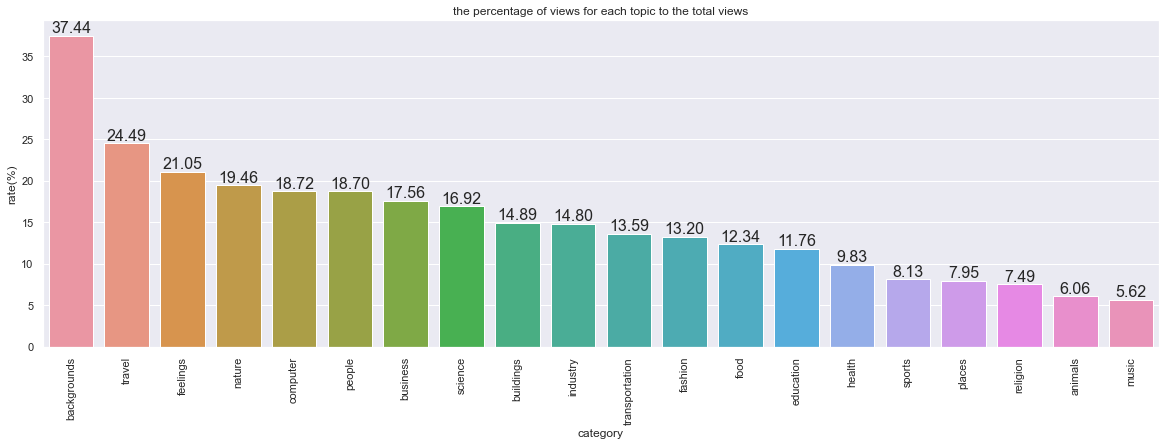

1103587102

In [21]:
Category=["backgrounds", "fashion","nature", 
"science", "education","feelings", "health", "people", "religion", "places", 
"animals", "industry", "computer", "food","sports", "transportation", "travel", "buildings", "business", "music"]
category={}
for i in range(len(Category)):
    views=0
    for n in range(4):
        if n !=0:
            pat='D:/photo/dh/pic2/'+Category[i]+str(n)+'/'
            JSONdocument = open(pat+'new_json.json')
            popular_json = json.load(JSONdocument)
            popular=popular_json['hits']
            for hit in popular:
                for s in hit['tags'].split(","):
                    s=s.strip()
                    category[Category[i]]=category.get(Category[i],0)+hit["views"]
ordercat=sorted(category.items(),key=lambda x:x[1],reverse=True)
X=[]
Y=[]        
for i in ordercat:
    X.append(i[0])
    Y.append(round((i[1]/ALLVIEWS*100),2))

plt.rcParams['figure.figsize'] = (20, 6.0)
sns.set(style="darkgrid")
plt.xticks(rotation=90)
sns.barplot(x=X,y=Y)
plt.xlabel("category")
plt.ylabel("rate(%)")
x = np.arange(len(X))    #在柱状图上插入数值
y = np.array(list(Y))

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=16)
plt.title("the percentage of views for each topic to the total views")
plt.show()
ALLVIEWS

the rate for woman :  9.64 %
the rate for sunset :  6.74 %
the rate for nature :  3.94 %
the rate for road :  3.72 %


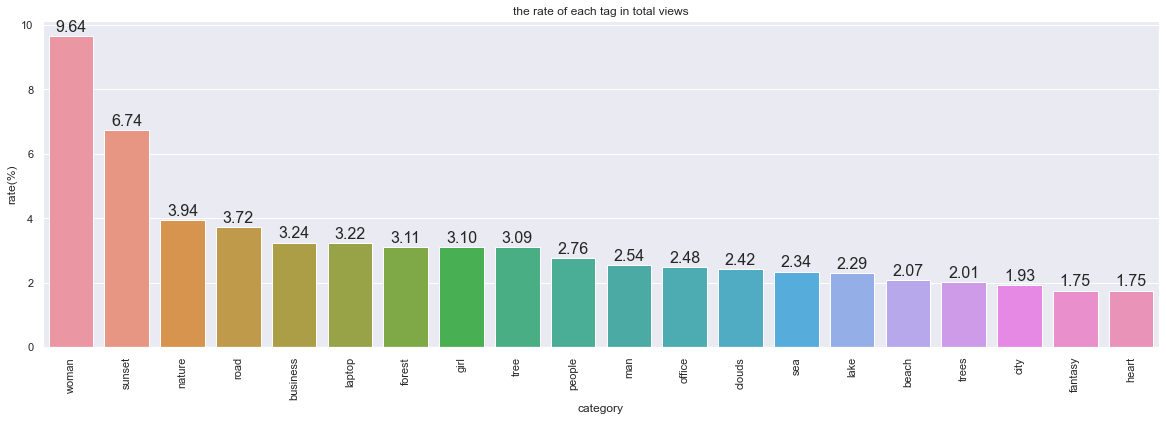

6135


In [14]:
Category=["backgrounds", "fashion","nature", 
"science", "education","feelings", "health", "people", "religion", "places", 
"animals", "industry", "computer", "food","sports", "transportation", "travel", "buildings", "business", "music"]
tag={}
for i in range(len(Category)):
    views=0
    for n in range(4):
        if n !=0:
            pat='D:/photo/dh/pic2/'+Category[i]+str(n)+'/'
            JSONdocument = open(pat+'new_json.json')
            popular_json = json.load(JSONdocument)
            popular=popular_json['hits']
            for hit in popular:
                for s in hit['tags'].split(","):
                    s=s.strip()
                    tag[s]=tag.get(s,0)+hit["views"]

ordertag=sorted(tag.items(),key=lambda x:x[1],reverse=True)
print("the rate for woman : ",round((tag['woman']/ALLVIEWS*100),2),"%")
print("the rate for sunset : ",round((tag['sunset']/ALLVIEWS*100),2),"%")
print("the rate for nature : ",round((tag['nature']/ALLVIEWS*100),2),"%")
print("the rate for road : ",round((tag['road']/ALLVIEWS*100),2),"%")

X=[]
Y=[]        
for i in ordertag[0:20]:
    X.append(i[0])
    Y.append(round((i[1]/ALLVIEWS*100),2))

plt.rcParams['figure.figsize'] = (20, 6.0)
sns.set(style="darkgrid")
plt.xticks(rotation=90)
sns.barplot(x=X,y=Y)
plt.xlabel("category")
plt.ylabel("rate(%)")
x = np.arange(len(X))    #在柱状图上插入数值
y = np.array(list(Y))

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=16)
plt.title("the rate of each tag in total views")
plt.show()
print(len(ordertag))

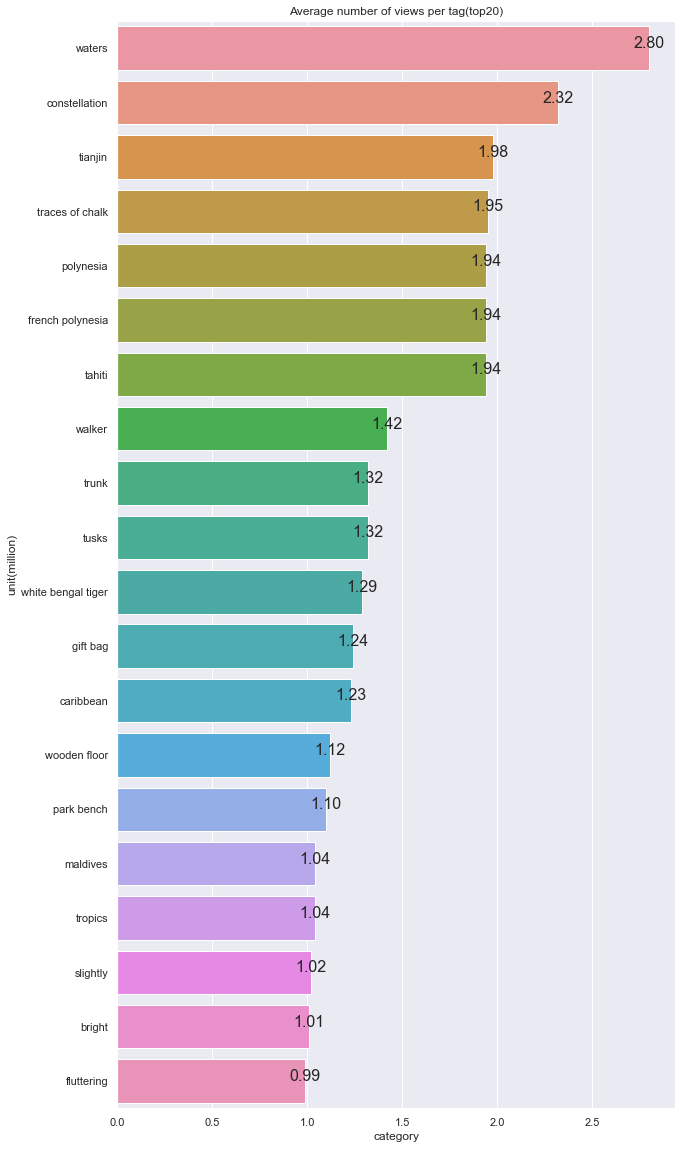

6135
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [15]:
Category=["backgrounds", "fashion","nature", 
"science", "education","feelings", "health", "people", "religion", "places", 
"animals", "industry", "computer", "food","sports", "transportation", "travel", "buildings", "business", "music"]
tag={}
numberoftag={}
for i in range(len(Category)):
    views=0
    for n in range(4):
        if n !=0:
            pat='D:/photo/dh/pic2/'+Category[i]+str(n)+'/'
            JSONdocument = open(pat+'new_json.json')
            popular_json = json.load(JSONdocument)
            popular=popular_json['hits']
            for hit in popular:
                for s in hit['tags'].split(","):
                    s=s.strip()
                    tag[s]=tag.get(s,0)+hit["views"]
                    numberoftag[s]=numberoftag.get(s,0)+1


averagetag={}

for key,value in tag.items():
    averagetag[key]=value/numberoftag[key]



ordertag=sorted(averagetag.items(),key=lambda x:x[1],reverse=True)


X=[]
Y=[]        
for i in ordertag[0:20]:
    X.append(i[0])
    y=round((i[1]/1000000),2)
    Y.append(y)
    

plt.rcParams['figure.figsize'] = (10, 20)
sns.set(style="darkgrid")
#plt.xticks(rotation=90)
sns.barplot(x=Y,y=X)
plt.xlabel("category")
plt.ylabel("unit(million)")
x = np.arange(len(X))    #在柱状图上插入数值
y = np.array(list(Y))

for a,b in zip(y,x):
    plt.text(a, b+0.05, '%.2f' % a, ha='center', va= 'bottom',fontsize=16)
plt.title("Average number of views per tag(top20)")
plt.show()
print(len(ordertag))
print(x)

In [16]:
ordertag[1][1]

2319838.0

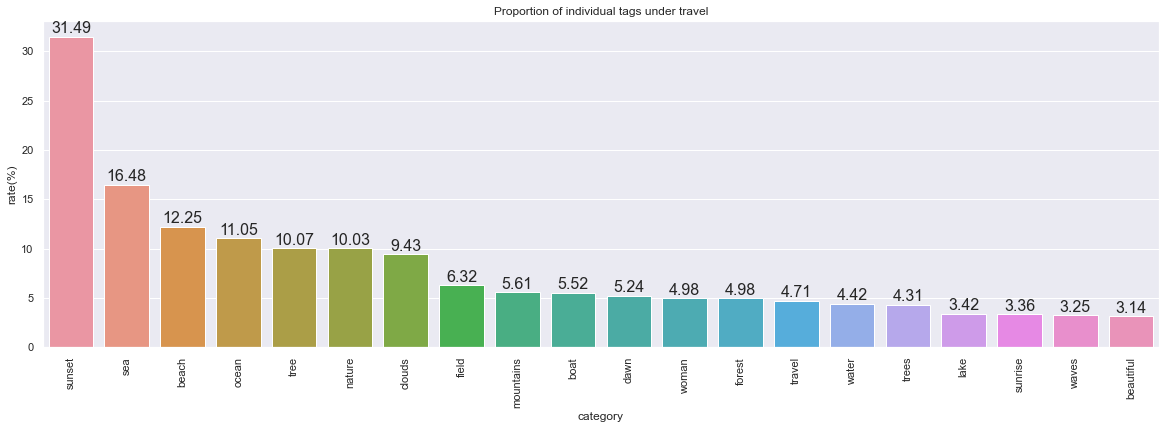

570


In [17]:
Category=["travel"]
tag={}
sumtag=0
for i in range(len(Category)):
    views=0
    for n in range(4):
        if n !=0:
            pat='D:/photo/dh/pic2/'+Category[i]+str(n)+'/'
            JSONdocument = open(pat+'new_json.json')
            popular_json = json.load(JSONdocument)
            popular=popular_json['hits']
            for hit in popular:
                sumtag=sumtag+hit["views"]
                for s in hit['tags'].split(","):
                    s=s.strip()
                    tag[s]=tag.get(s,0)+hit["views"]

ordertag=sorted(tag.items(),key=lambda x:x[1],reverse=True)


X=[]
Y=[]        
for i in ordertag[0:20]:
    X.append(i[0])
    Y.append(round((i[1]/sumtag*100),2))

plt.rcParams['figure.figsize'] = (20, 6.0)
sns.set(style="darkgrid")
plt.xticks(rotation=90)
sns.barplot(x=X,y=Y)
plt.xlabel("category")
plt.ylabel("rate(%)")
x = np.arange(len(X))    #在柱状图上插入数值
y = np.array(list(Y))

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=16)
plt.title("Proportion of individual tags under travel")
plt.show()
print(len(ordertag))

the rate for woman :  0.41 %
the rate for sunset :  2.57 %
the rate for nature :  0.82 %
the rate for road :  0.11 %


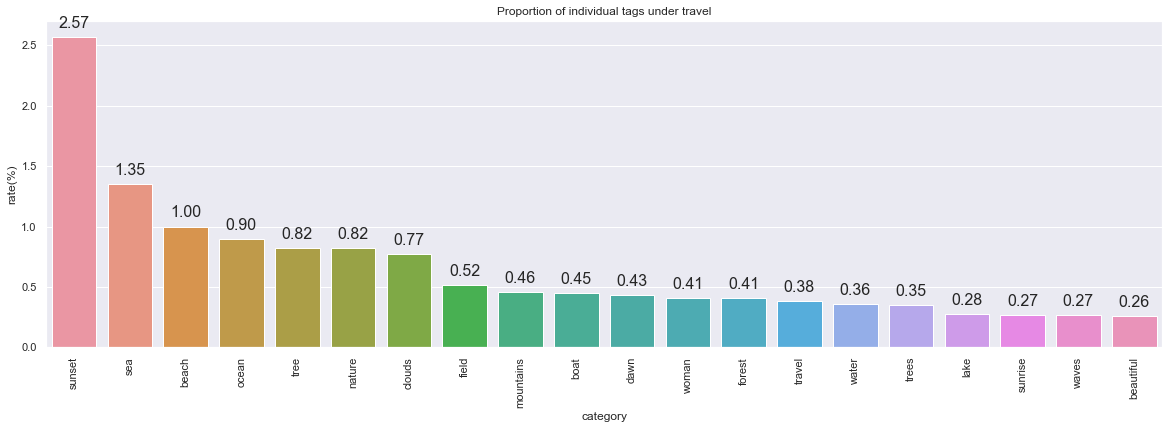

570


In [18]:
Category=["travel"]
tag={}
for i in range(len(Category)):
    views=0
    for n in range(4):
        if n !=0:
            pat='D:/photo/dh/pic2/'+Category[i]+str(n)+'/'
            JSONdocument = open(pat+'new_json.json')
            popular_json = json.load(JSONdocument)
            popular=popular_json['hits']
            for hit in popular:
                for s in hit['tags'].split(","):
                    s=s.strip()
                    tag[s]=tag.get(s,0)+hit["views"]

ordertag=sorted(tag.items(),key=lambda x:x[1],reverse=True)
print("the rate for woman : ",round((tag['woman']/ALLVIEWS*100),2),"%")
print("the rate for sunset : ",round((tag['sunset']/ALLVIEWS*100),2),"%")
print("the rate for nature : ",round((tag['nature']/ALLVIEWS*100),2),"%")
print("the rate for road : ",round((tag['road']/ALLVIEWS*100),2),"%")

X=[]
Y=[]        
for i in ordertag[0:20]:
    X.append(i[0])
    Y.append(round((i[1]/ALLVIEWS*100),2))

plt.rcParams['figure.figsize'] = (20, 6.0)
sns.set(style="darkgrid")
plt.xticks(rotation=90)
sns.barplot(x=X,y=Y)
plt.xlabel("category")
plt.ylabel("rate(%)")
x = np.arange(len(X))    #在柱状图上插入数值
y = np.array(list(Y))

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=16)
plt.title("Proportion of individual tags under travel")
plt.show()
print(len(ordertag))

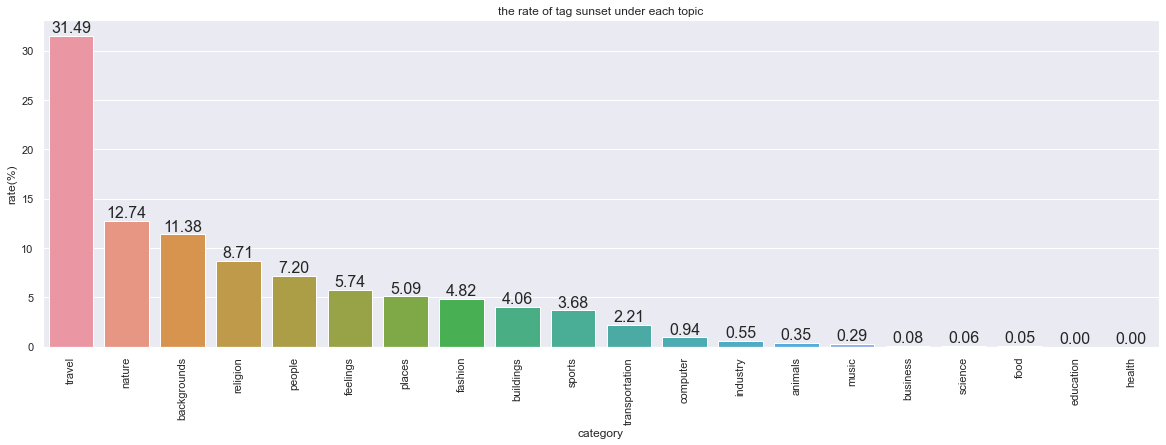

In [19]:
Category=["backgrounds", "fashion","nature", 
"science", "education","feelings", "health", "people", "religion", "places", 
"animals", "industry", "computer", "food","sports", "transportation", "travel", "buildings", "business", "music"]

sunsetrate={}
#sumviewsforeach=[]
for i in range(len(Category)):
    sun=0
    #sumview=0
    for n in range(4):
        if n !=0:
            pat='D:/photo/dh/pic2/'+Category[i]+str(n)+'/'
            JSONdocument = open(pat+'new_json.json')
            popular_json = json.load(JSONdocument)
            popular=popular_json['hits']
            #sumview=sumview+hit['views']
            for hit in popular:
                for s in hit['tags'].split(","):
                    s=s.strip()
                    s=s.lower()
                    if s=="sunset":
                        sun=sun+hit['views']
    #sumviewsforeach.append(sumview)
    sunsetrate[Category[i]]= round((sun/ALL[Category[i]]*100),2)
            
            
ordersunset=sorted(sunsetrate.items(),key=lambda x:x[1],reverse=True)
X=[]
Y=[]        
for i in ordersunset:
    X.append(i[0])
    Y.append(i[1])

plt.rcParams['figure.figsize'] = (20, 6.0)
sns.set(style="darkgrid")
plt.xticks(rotation=90)
sns.barplot(x=X,y=Y)
plt.xlabel("category")
plt.ylabel("rate(%)")
x = np.arange(len(X))    #在柱状图上插入数值
y = np.array(list(Y))

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=16)
plt.title("the rate of tag sunset under each topic")
plt.show()

In [20]:
#
for i in range(len(Category)):
    views=0
    for n in range(4):
        if n !=0:
            pat='D:/photo/dh/pic2/'+Category[i]+str(n)+'/'
            JSONdocument = open(pat+'new_json.json')
            popular_json = json.load(JSONdocument)
            popular=popular_json['hits']
            for hit in popular:
                for s in hit['tags'].split(","):
                    s=s.strip()